<a href="https://colab.research.google.com/github/Niharikaasopa/OIBSIP/blob/main/SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK : 5**

***SALES PREDICTION USING PYTHON***

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))
print(df)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: >

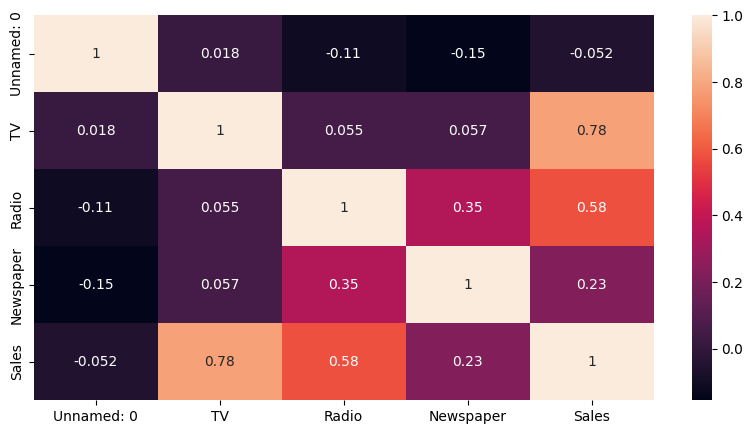

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

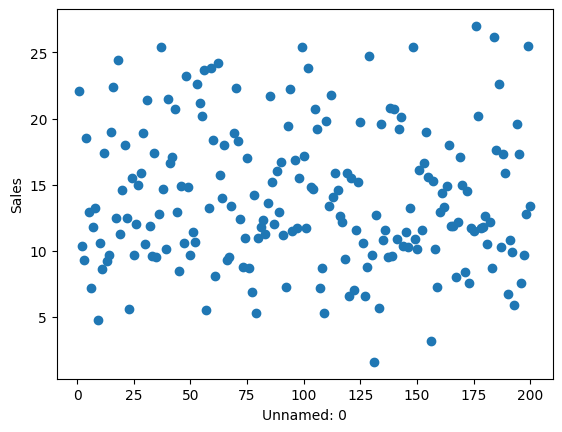

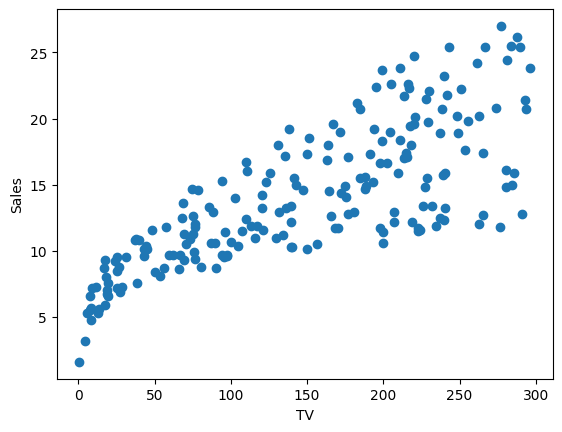

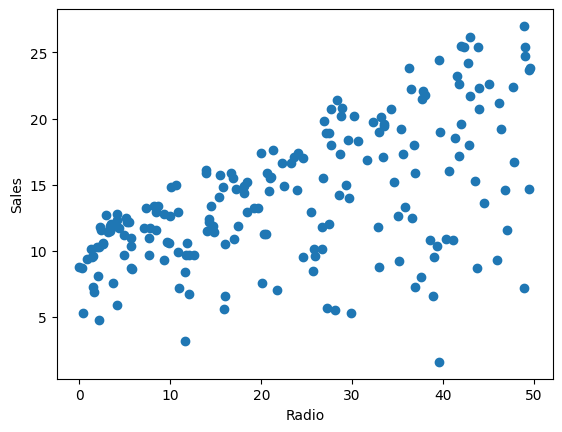

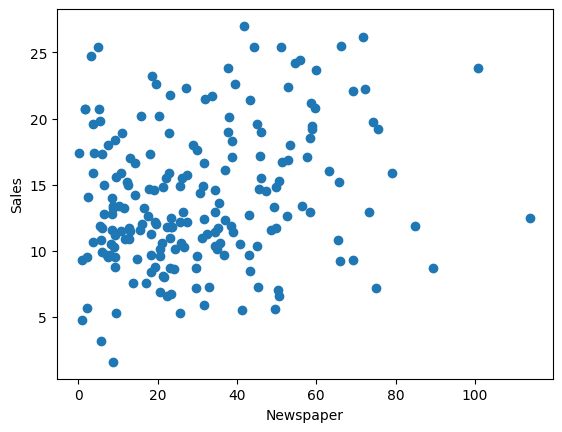

In [12]:
for col in df.columns:
    if col != 'Sales':
        plt.plot(df[col], df['Sales'], 'o')
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

In [25]:
df['TV_sq'] = df['TV']**2
df['Radio_sq'] = df['Radio']**2

df['TV_Radio'] = df['TV'] * df['Radio']

X = df[['TV', 'Radio', 'Newspaper', 'TV_sq', 'Radio_sq', 'TV_Radio']]

y = df[['Sales']].values

X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.36929321119335634


In [30]:
y_predictions=model.predict(X_test)
y_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.94654264, 5.00697875, 4.9346529 , 4.94902409, 4.95238388,
       4.95363074, 4.96325811, 4.82674316, 4.79988877, 4.88799565,
       4.85272661, 4.81997538, 4.88987908, 4.87945428, 4.80641288,
       4.83933088, 4.91280691, 4.87126352, 4.8762028 , 4.88590202,
       4.98083426, 5.03510534, 4.92070145, 4.99584345, 4.79742177,
       4.79637889, 4.96785727, 4.83079452, 4.83803803, 4.86092737,
       4.8051869 , 4.85915064, 5.02233871, 5.02818636, 4.87324822,
       4.90346904, 4.94049703, 4.9551071 , 4.82424774, 4.79355969,
       4.82108628, 4.80959873, 4.90122675, 4.83064826, 4.79957022,
       4.7926865 , 4.87096007, 4.87589867, 4.82743442, 4.8814468 ,
       4.97334341, 4.80895179, 5.0283733 , 4.96264443, 4.78465726,
       4.82471551, 4.84005907, 4.99490698, 4.85467096, 4.7894825 ])

In [32]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_predictions,y_test))
print('Root of the Mean of the Square of Errors:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

Mean Absolute Error: 8.029061520984115
Root of the Mean of the Square of Errors: 9.55984956420813
R-Squared -17320.112495503523
